# Applied Data Science 1
### Student Name: Joshua Obodai
## Monroe County Car Crash Basic Statistics
We will explore here some basic statistics and operations on pandas dataframes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
def plot_type_of_day_graph(categories, accident_counts):
    """
    Plots the type of day accidents occur from the provided DataFrame.
    """
    plt.figure(dpi=144)
    plt.bar(categories, accident_counts, color=['skyblue', 'salmon'], 
            label=['Weekday', 'Weekend'])
    
    plt.xlabel('Type of Day', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.title('Accidents During the Week vs. Weekend (2003-2015)')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()
    return

In [3]:
def plot_collision_type_distribution(data, order):
    """
    Plots the type of collision from the provided DataFrame.
    """        
    plt.figure(figsize=(10, 6), dpi=144)
    sns.countplot(y='Collision Type', data=data, order=order, 
                  palette='viridis')
    
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Collision Type', fontsize=12)
    plt.title('Distribution of Collision Types in Monroe County (2003-2015)')
    plt.show()
    return

In [4]:
def plot_top_causes_of_accidents(primary_factors, counts):
    """
    Plots the top 10 primary causes of accidents in Monroe County.
    """
    plt.figure(figsize=(10, 8), dpi=144)
    plt.barh(primary_factors, counts, color='skyblue')
    plt.title('Top 10 Primary Causes of Accidents')
    plt.xlabel('Number of Accidents', fontsize=12)
    plt.ylabel('Primary Cause', fontsize=12)
    
    # To display the highest number at the top
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    return

In [5]:
def plot_accidents_over_years(accidents_per_year):
    """
    Plots the yearly total of accidents from the provided DataFrame.
    """
    plt.figure(figsize=(10, 6), dpi=144)
    plt.plot(accidents_per_year, marker='o', linestyle='-', color='blue')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.title('Trend of Car Accidents in Monroe County Over the Years')
    plt.xticks(accidents_per_year.index)
    plt.grid(True, linestyle='--')
    plt.show()
    return

In [6]:
def plot_crashes_by_hour(data):
    """
    Plots the hourly total of accidents from the provided DataFrame.
    """
    plt.figure(figsize=(12, 8), dpi=144)
    sns.violinplot(x='Adjusted_Hour', data=data, palette="coolwarm")
    plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)], rotation=45)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.title('Distribution of Car Crashes by Hour of the Day (2003-2015)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    return

In [7]:
def plot_crash_correlation(data, method):
    """
    Plots correlation of crash data with different methods
    """
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(data.corr(numeric_only=True)))
    sns.heatmap(data.corr(numeric_only=True, method=method), ax=ax, 
                vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    plt.show()
    return

In [8]:
def statistical_analysis(data):
    """
    Prints Skewness and Kurtosis for Numeric Columns
    """
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        print(f"{column}: Skewness is {skew(data[column].dropna())}")
        print(f"{column}: Kurtosis is {kurtosis(data[column].dropna())}", 
              end='\n\n')
    return

In [9]:
def correlation_analysis(data, method):
    """
    Prints the correlation matrix with different methods
    """
    correlation_matrix = data.corr(method=method, numeric_only=True)
    print(f"{method.capitalize()}'s Correlation Matrix:", end='\n')    
    print(correlation_matrix)
    return

Import the dataset and display the first 5 rows

In [10]:
file_path = 'monroe county car crash.csv'
df_raw_crash_data = pd.read_csv(file_path, encoding='ISO-8859-1')
df_raw_crash_data.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


View the basic statistics

In [11]:
df_raw_crash_data.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [12]:
df_raw_crash_data.std(numeric_only=True)

Year           3.789760
Month          3.514630
Day            1.909440
Hour         531.654039
Latitude      11.289883
Longitude     24.957587
dtype: float64

Cleaning the crash data and modifying it to be more suitable for use

In [13]:
df_crash_data = df_raw_crash_data.dropna(subset=['Collision Type', 'Reported_Location', 'Latitude', 'Longitude', 'Hour'])
df_crash_data = df_crash_data.copy()
df_crash_data['Adjusted_Hour'] = df_crash_data['Hour'].round(0).astype(int)
df_crash_data.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Adjusted_Hour
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,0
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,1500
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,2300
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,900
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,1100


### Categorical Graphs

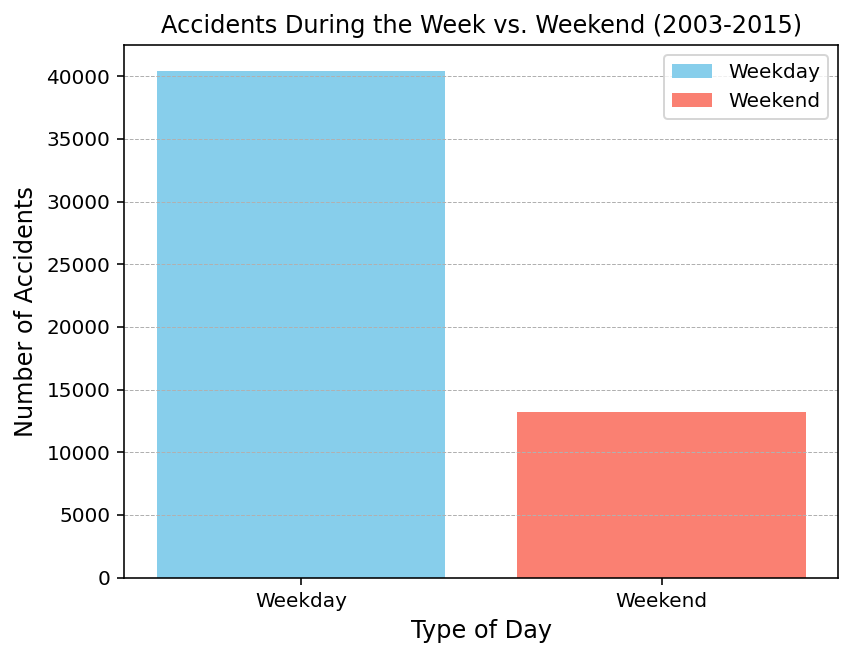

In [14]:
# Counting the number of accidents for 'Weekday' and 'Weekend'
crash_distribution = df_crash_data['Weekend?'].value_counts()
categories = crash_distribution.index
accident_counts = crash_distribution.values
plot_type_of_day_graph(categories, accident_counts)

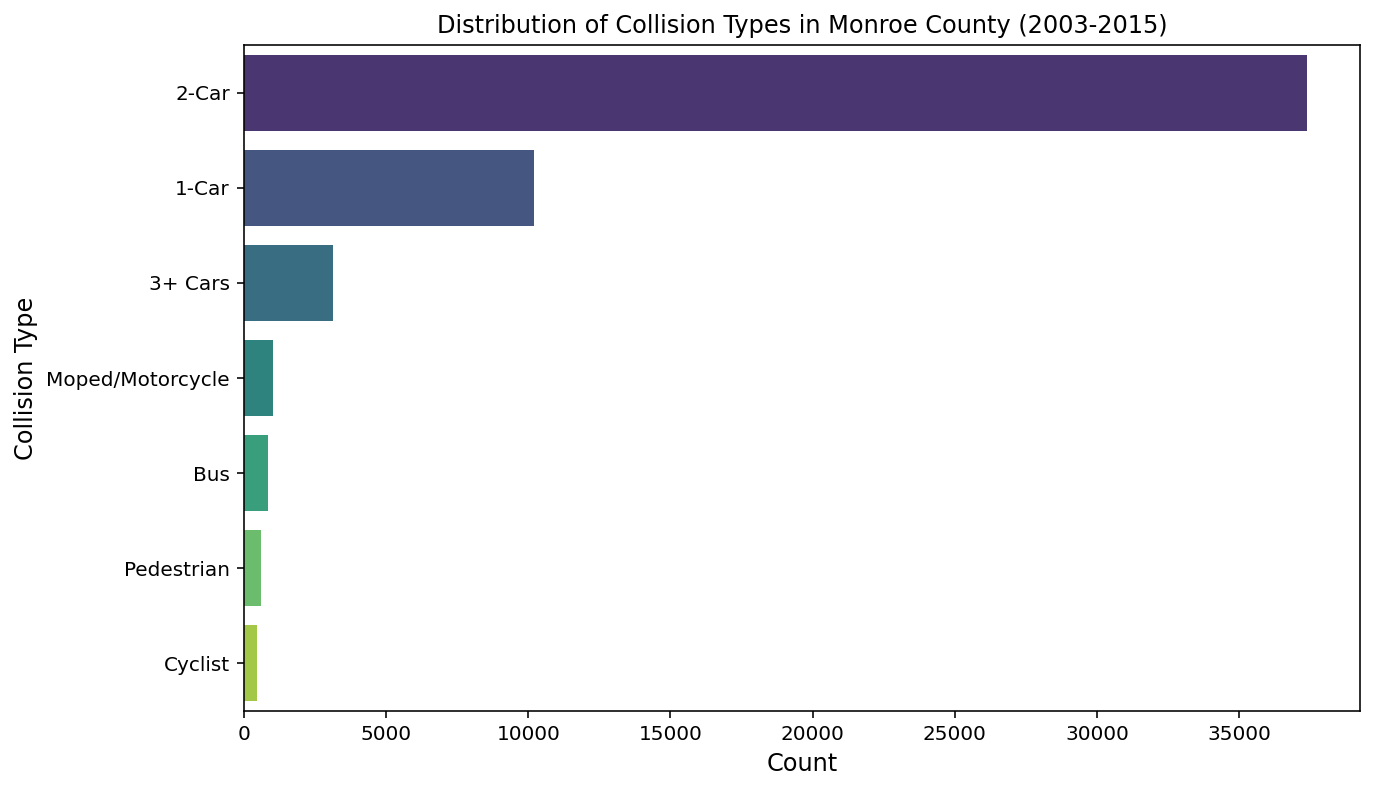

In [15]:
# This gets the sequence in which the data will appear
order = df_crash_data['Collision Type'].value_counts().index
plot_collision_type_distribution(df_crash_data, order)

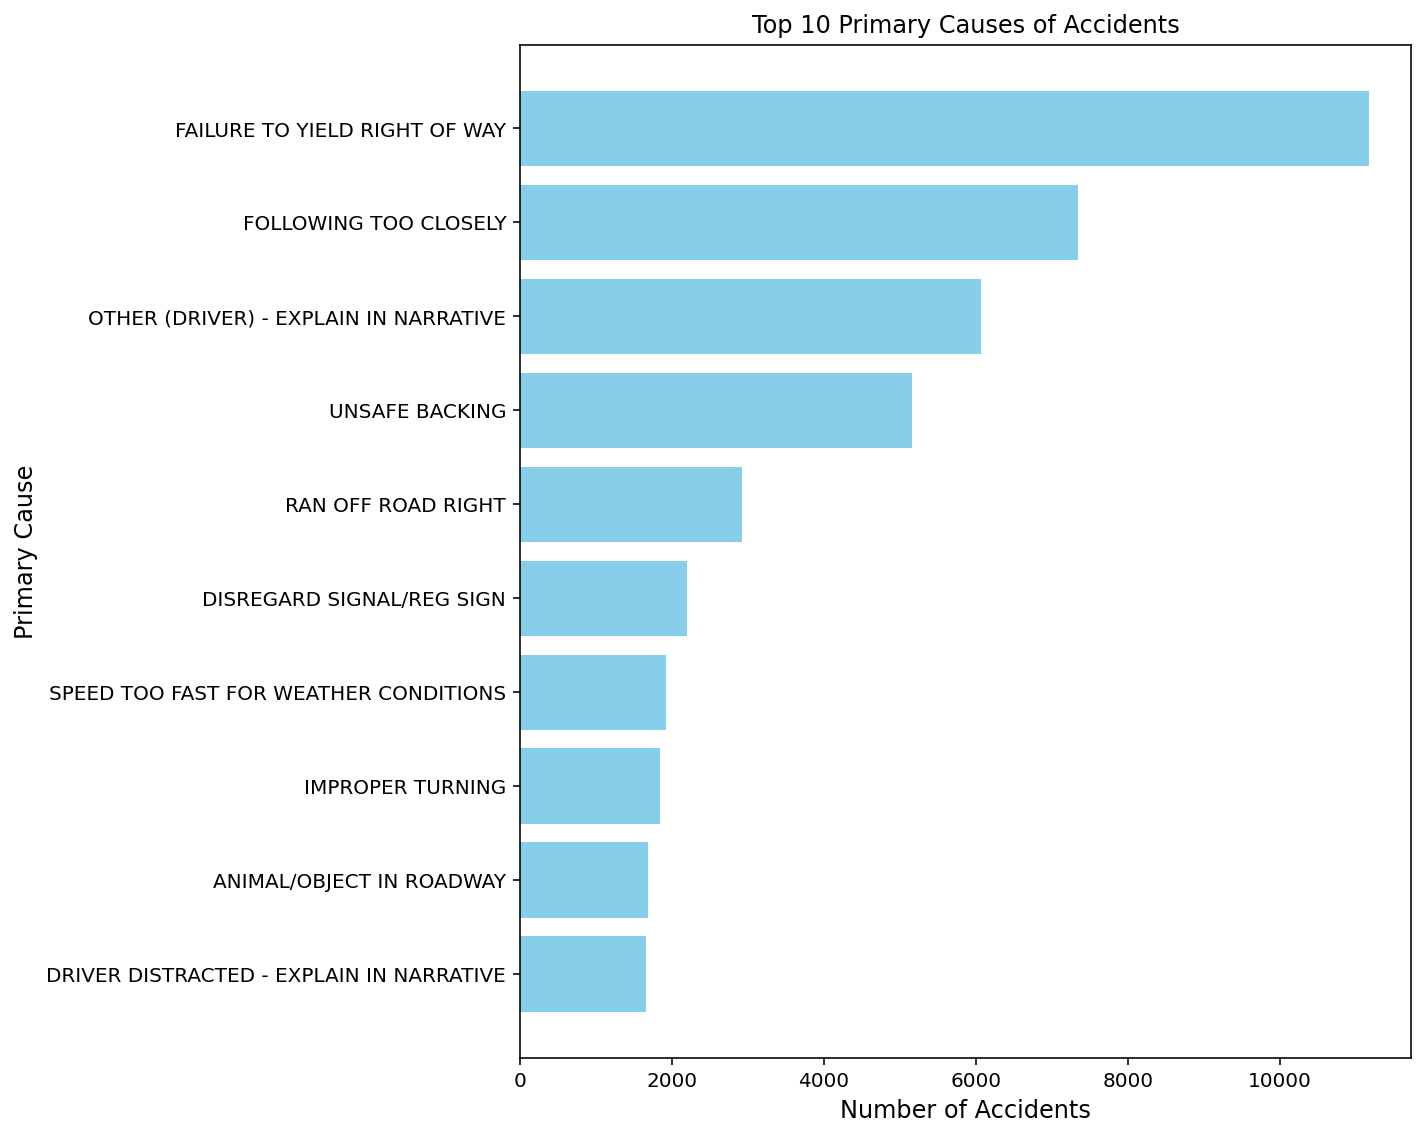

In [16]:
# Count the occurrences of each primary factor
primary_factor_counts = df_crash_data['Primary Factor'].value_counts().head(10)
primary_factors = primary_factor_counts.index
counts = primary_factor_counts.values
plot_top_causes_of_accidents(primary_factors, counts)

### Relational Graph

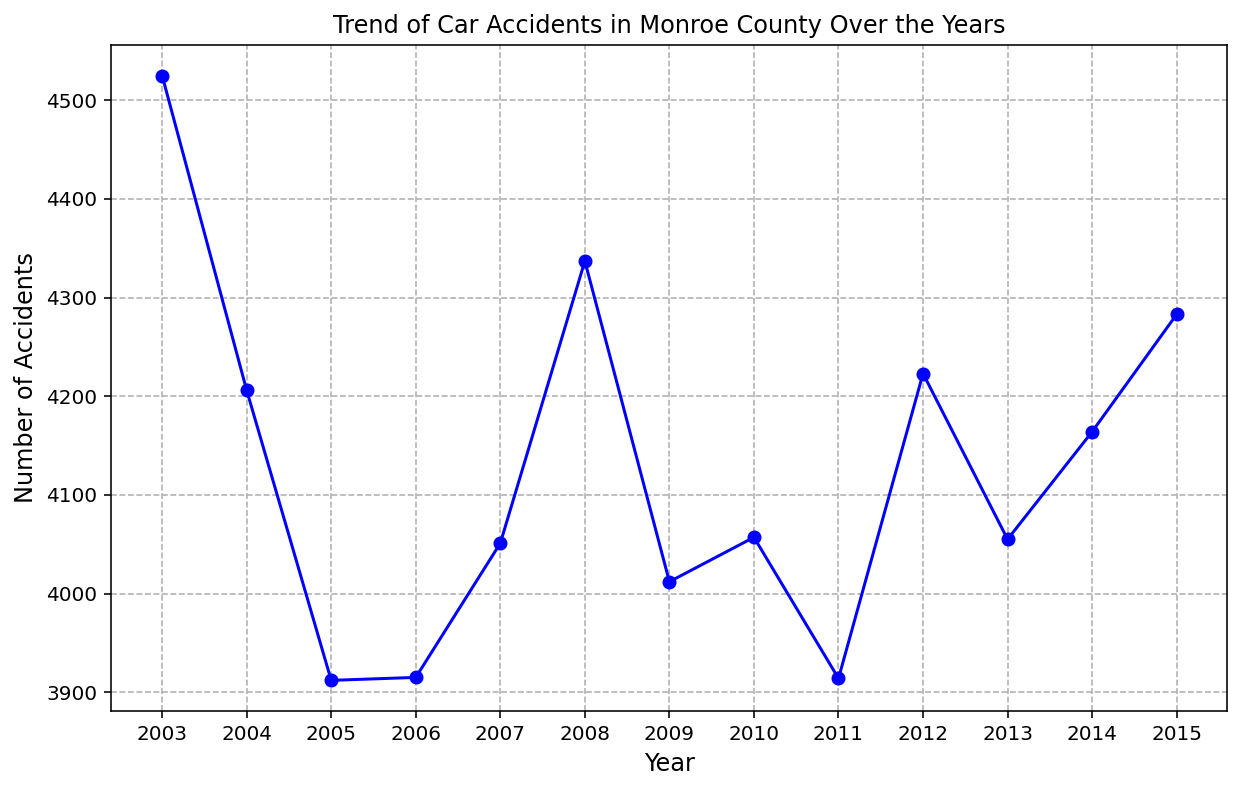

In [17]:
accidents_per_year = df_crash_data.groupby('Year').size()    
plot_accidents_over_years(accidents_per_year)

Viewing some more statistics

In [18]:
statistical_analysis(df_crash_data)

Year: Skewness is -0.0036324598687799852
Year: Kurtosis is -1.224766016442388

Month: Skewness is -0.09563583442111716
Month: Kurtosis is -1.2741309341356881

Day: Skewness is -0.11358753006989437
Day: Kurtosis is -1.1817199040532806

Hour: Skewness is -0.5282931640118897
Hour: Kurtosis is -0.09433087543989771

Latitude: Skewness is -2.845940370401964
Latitude: Kurtosis is 6.099807602166564

Longitude: Skewness is 2.8482470289963695
Longitude: Kurtosis is 6.123474460954522

Adjusted_Hour: Skewness is -0.5282931640118897
Adjusted_Hour: Kurtosis is -0.09433087543989771



### Statistical Graphs

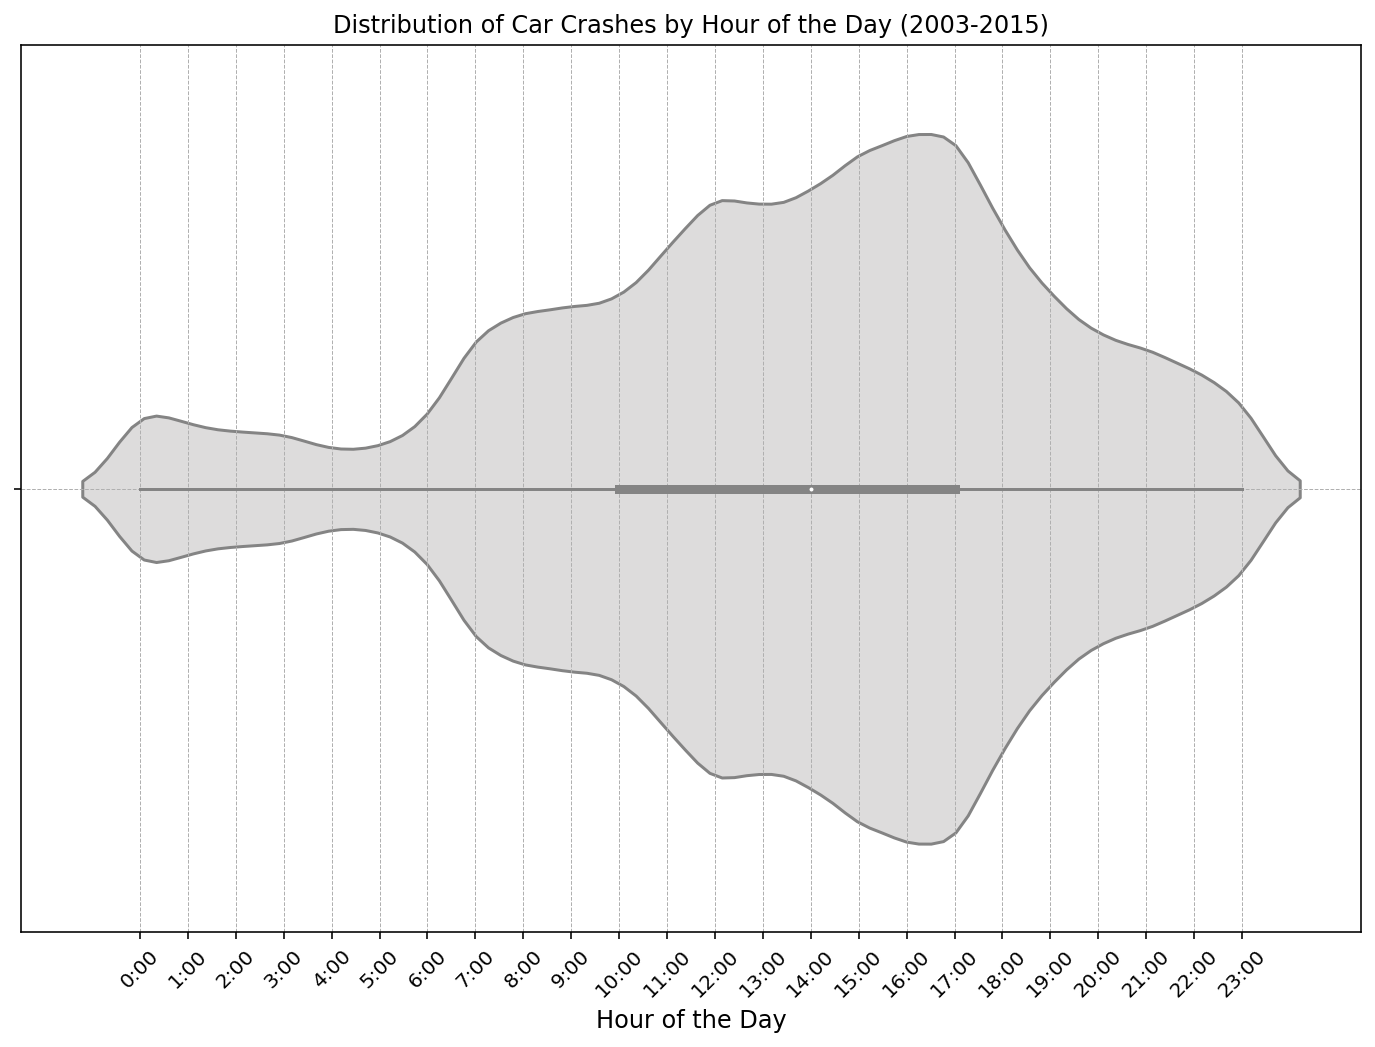

In [19]:
# process 'Adjusted_Hour' to convert from HHMM to an hour range of 0-23
df_crash_data['Adjusted_Hour'] = (df_crash_data['Adjusted_Hour'] // 100).astype(int)
plot_crashes_by_hour(df_crash_data)

Pearson's Correlation Matrix:
               Year     Month       Day      Hour  Latitude  Longitude
Year       1.000000 -0.001959 -0.006224 -0.020284  0.067252  -0.067124
Month     -0.001959  1.000000 -0.010212  0.013181 -0.016465   0.016571
Day       -0.006224 -0.010212  1.000000  0.008256  0.004456  -0.004584
Hour      -0.020284  0.013181  0.008256  1.000000  0.006465  -0.006451
Latitude   0.067252 -0.016465  0.004456  0.006465  1.000000  -0.999402
Longitude -0.067124  0.016571 -0.004584 -0.006451 -0.999402   1.000000


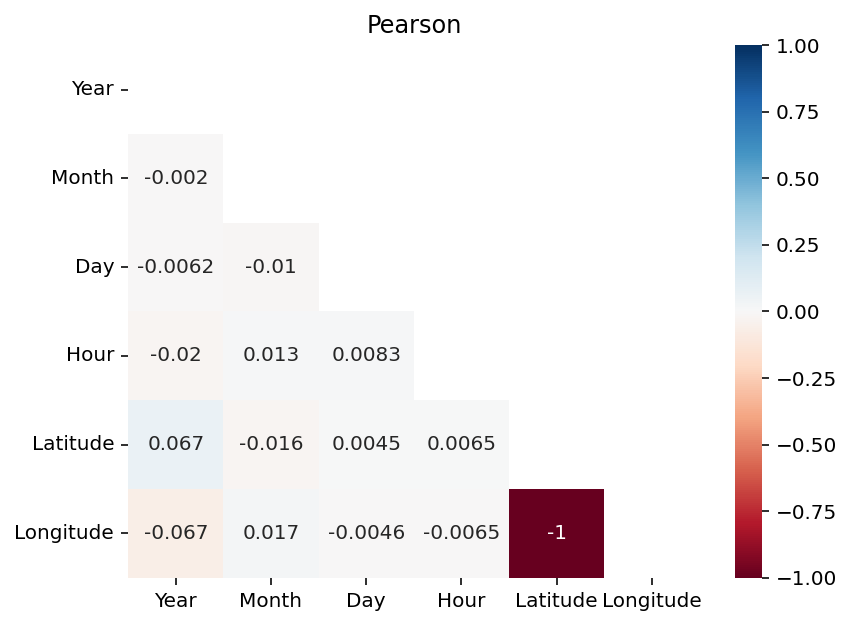

Kendall's Correlation Matrix:
               Year     Month       Day      Hour  Latitude  Longitude
Year       1.000000 -0.001573 -0.004536 -0.010824  0.013300  -0.038256
Month     -0.001573  1.000000 -0.007138  0.008081 -0.005429   0.008826
Day       -0.004536 -0.007138  1.000000  0.005235  0.002256  -0.006373
Hour      -0.010824  0.008081  0.005235  1.000000  0.005053   0.010361
Latitude   0.013300 -0.005429  0.002256  0.005053  1.000000  -0.169563
Longitude -0.038256  0.008826 -0.006373  0.010361 -0.169563   1.000000


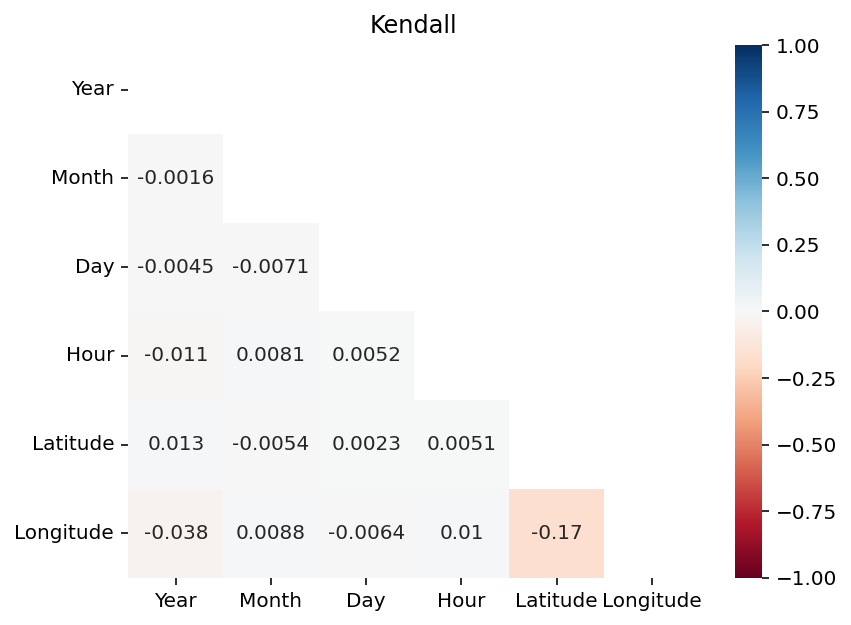

In [20]:
# drop Adjusted_Hour column
if 'Adjusted_Hour' in df_crash_data.columns:
    df_crash_data = df_crash_data.drop('Adjusted_Hour', axis=1)

corr_methods = ['pearson', 'kendall']

for method in corr_methods:
    correlation_analysis(df_crash_data, method)
    plot_crash_correlation(df_crash_data, method)